การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 7 พลวัตสัมผัสและพื้นฐานการเคลื่อนที่ของขาหุ่นยนต์

วิธีการแก้ปัญหาเพื่อหาคำตอบเหมาะที่สุดที่เราได้ศึกษามามีสมมุติฐานอยู่บนความเรียบของฟังก์ชัน 
ตัวอย่างเช่นวิธีนิวตันต้องการฟังก์ชัน $\mathcal{C}^2$ ที่หาอนุพันธ์ได้ถึงอันดับสอง
แต่ในระบบหลายประเภทเช่นหุ่นยนต์เคลื่อนที่จะต้องมีการสัมผัสกับสภาพแวดล้อม เช่นการในเดินของหุ่นยนต์ที่มีขา ณ เวลาที่เท้าสัมผัสพื้นจะโมเดลได้เป็นฟังก์ชันไม่ต่อเนื่อง หรือการทำงานของมือหุ่นยนต์ที่ต้องมีการสัมผัสชิ้นงาน  
ดังนั้นต้องมีการจัดการกับระบบที่มีการทำงานดังกล่าวเพื่อสามารถใช้วิธีการที่มีพื้นฐานบนฟังก์ชันต่อเนื่องได้ ในบทนี้จะแนะนำ 2 วิธีการที่มีข้อดีและข้อเสียแตกต่างกัน และพื้นฐานการเคลื่อนที่สำหรับโมเดลขาหุ่นยนต์อย่างง่าย

## 7.1 พลวัตสัมผัส

เพื่อความเข้าใจและสามารถโมเดลพลวัตสัมผัส (contact dynamics) พิจารณาลูกบอลที่ปล่อยลงสู่พื้นดังในรูปที่ 7.1 
ทางด้านขวาของรูปแสดงกราฟของตำแหน่งและความเร็ว ในช่วงที่บอลลอยในอากาศหลังการปล่อย พลวัตจะขึ้นกับมวลและแรงโน้มถ่วงของโลก
$$
m\ddot{z} = -mg \tag{7.1}
$$

ซึ่งเป็นสมการเชิงอนุพันธ์สามัญ  (ordinary differential equation เรียกย่อว่า ODE) ที่เรียบและต่อเนื่อง แต่ ณ เวลาที่บอลกระทบพื้น ความเร็วจะเปลี่ยนจาก $v^-$ เป็น $v^+$ ในทันที ฟังก์ชันความเร็วจะไม่ต่อเนื่องดังแสดงในกราฟ ค่าความเร่งคืออนุพันธ์จะเป็นอิมพัลส์มีค่าอนันต์ ความไม่ต่อเนื่องนี้ทำให้ไม่สามารถบรรยายพลวัตในช่วงกระทบพื้นโดย ODE ได้

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch7_ballbounce.png" width=800 />
</div>
<div align="center">
รูปที่ 7.1 พลวัตสัมผัสของลูกบอลที่ปล่อยลงสู่พื้น
</div>










## 7.2 การจัดการกับระบบที่มีพลวัตสัมผัส

วิธีการที่จะกล่าวถึงต่อไปแม้ว่าอาจมิใช่เป็นทางเลือกทั้งหมด แต่เป็นการจัดการกับพลวัตสัมผัสที่ประสบผลสำเร็จในระบบหลายประเภท

### 7.2.1 วิธีลูกผสม

วิธีแรกที่มีการใช้งานอย่างกว้างขวางในหุ่นยนต์และระบบที่มีการเคลื่อนที่เรียกว่า *วิธีลูกผสม (hybrid method)* หรือ *วิธีบนพื้นฐานของเหตุการณ์ 
(event-based method)* หลักการคือค่าปริพันธ์ของ ODE พร้อมกับการตรวจสอบเหตุการณ์เกิดการสัมผัสโดยใช้ฟังก์ชันการ์ด (guard function) 
เช่นตรวจสอบค่า $z \ge 0$ เมื่อมีการสัมผัสเกิดขึ้น สั่งให้ *จัมพ์แมพ (jump map)* ทำงานเพื่อโมเดลความไม่ต่อเนื่อง 
หลังจากนั้นจึงหาค่าปริพันธ์ของ ODE ต่อไป

<u>**ข้อดี**</u>

* อิมพลิเมนต์ได้ง่าย โดยสามารถใช้งานร่วมกับอัลกอริทึมมาตรฐานเช่น DIRCOL, MPC 
* สามารถใช้วิธีการหาปริพันธ์ที่มีความแม่นยำ เช่น RK4

<u>**ข้อด้อย**</u>

* ในกรณีงานที่ซับซ้อนเช่นการแก้ปัญหารูบิกด้วยมือหุ่นยนต์  จะมีโหมดการสัมผัสจำนวนมาก ยากที่จะจัดการกับโหมดทั้งหมดรวมถึงลำดับการทำงาน

**ตัวอย่าง 7.1** ใช้วิธีลูกผสมจำลองพลวัตของบอลในรูปที่ 7.1 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

นิยามพลวัตของลูกบอลในอากาศ และการหาปริพันธ์แบบ RK4

In [2]:
def ball_dynamics(x):
    g = 9.81
    # r = x[0:2].reshape(2,1)
    v = x[2:4].reshape(2,1)
    v_dot = np.array([0,-g]).reshape(2,1)
    x_dot = np.vstack((v,v_dot))
    return x_dot

In [3]:
def ball_dynamics_rk4(x):
    # RK4 integration with zero-order hold on u 
    xdim = x.shape[0]
    f1 = ball_dynamics(x)
    x_a = x.reshape(xdim,1)
    x_2 = x_a + 0.5*h*f1
    f2 = ball_dynamics(x_2.flatten())
    x_3 = x_a + 0.5*h*f2
    f3 = ball_dynamics(x_3.flatten())
    x_4 = x_a + 0.5*h*f3
    f4 = ball_dynamics(x_4.flatten())
    return x_a+(h/6.0)*(f1+2*f2 + 2*f3+f4)    

นิยามฟังก์ชันการ์ด ซึ่งจะคืนค่าระยะในแนวดิ่งสำหรับตรวจสอบว่ากระทบพื้นหรือไม่

In [4]:
def guard(x):
    return x[1]

และฟังก์ชันจัมพ์แมพเพื่อนิยามการกระทำเมื่อมีการสัมผัสเกิดขึ้น โดยเราจะกำหนดค่าตัวแปร $y$ เรียกว่า สัมประสิทธ์การคืน 
(coefficient of restitution) ในช่วง 0 - 1 เพื่อโมเดลการเด้งกลับของลูกบอล โดยค่า 0 คือไม่มีการคืนกลับความเร็ว 
เสมือนเป็นบอลเหล็กที่จะอยู่กับพื้นหลังสัมผัส ส่วนค่า 1 คือการคืนกลับความเร็วทั้งหมดโดยไม่มีการสูญเสียใดๆ 
(ในระบบเวลาต่อเนื่องคือลูกบอลเด้งด้วยความสูงเท่าเดิมตลอดไป หรือในการจำลองแบบดีสครีตอาจพบว่าการเด้งกลับของบอลมีขนาดใหญ่ขึ้น 
 ซึ่งทั้งสองกรณีเป็นไปไม่ได้ในทางปฎิบัติ) ดังนั้นในการจำลองเราจะจำกัดค่าสูงสุดไว้ประมาณ 0.9

จัมพ์แมพจะคืนค่าสถานะที่ระยะในแนวแกน $z$ เป็นศูนย์และความแร็ว $\dot{z}$ คือความเร็วที่คืนกลับ $v^+ = yv^-$ 

In [5]:
def jump(x):
    #Flip sign of vertical component of velocity and multiply by coefficient of restitution
    y = 0.8 # 0 - 0.9
    xn = np.array([x[0],0.0,x[2],-y*x[3]]).reshape(4,1)
    return xn

กำหนดสถานะเริ่มต้น โดยค่าตำแหน่งเริ่มต้นที่ความสูงตามต้องการเช่น 1 เมตร ส่วนความเร็วต้นจะให้เป็นศูนย์ทั้งหมด 
หรือให้ความเร็วในแนวนอนด้วยก็ได้ ที่จะมีผลทำให้บอลหล่นไปทางซ้ายหรือขวาตามทิศทางของความเร็วนั้น 

In [6]:
r0 = np.array([0.0,1.0])
v0 = np.array([0.0,0.0])
x0 = np.hstack((r0,v0)).reshape(4,1)

กำหนดตัวแปรคาบเวลา จำนวนสถานะ เวลาปลายและคำนวณจำนวนขั้นเวลา

In [7]:
h = 0.01 #100 Hz
Nx = 4     # number of states 
Tfinal = 3.0 # final time 
Nt = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(Nt-1),h)

จำลองตามจำนวนขั้นเวลา สังเกตว่าในโค้ดนี้เพียงตรวจสอบว่าในขั้นเวลาหนึ่งมีการสัมผัสหรือไม่ 
และเรียกจัมพ์แมพ ณ เวลาปลายของขั้นนั้น ซึ่งในความเป็นจริงการสัมผัสอาจเกิดขึ้น ณ เวลาใดในระว่างขั้นเวลานั้น 
ดังนั้นจึงมีความคลาดเคลื่อนอยู่บ้าง แต่สำหรับอัตราการสุ่มที่สูงเพียงพอ ความคลาดเคลื่อนของเวลามีค่าน้อยพอยอมรับได้

หากต้องการทราบเวลาสัมผัสที่แน่นอน สามารถเขียนโค้ดเพื่อประมาณค่าย้อนกลับหาเวลาสัมผัสเมื่อ guard(x) มีค่าประมาณเท่ากับ 0 ได้ 
ในตัวอย่างนี้ไม่จำเป็นจึงละทิ้งในส่วนนี้

In [8]:
xhist = np.zeros((Nx,Nt))
xhist[:,[0]] = x0
for k in range(Nt-1):
    xhist[:,[k+1]] = ball_dynamics_rk4(xhist[:,k])
    if guard(xhist[:,k+1]) <= 0:
        # interpolate back to guard=0 if desired
        xhist[:,[k+1]] = jump(xhist[:,k+1])

พล็อตระยะทางและความเร็วในแนวแกน $z$ ของลูกบอลได้ดังในรูปที่ 7.2 และ 7.3 ตามลำดับ ทดลองเปลี่ยนค่าสัมประสิทธ์การคืน y 
เพื่อดูการเปลี่ยนแปลงของผลตอบสนอง

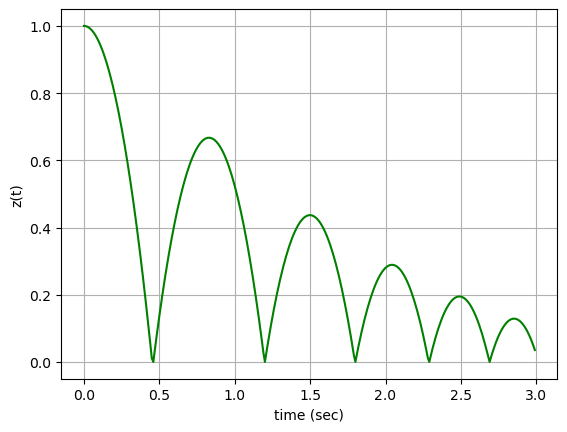

In [9]:
plt.figure()
plt.plot(thist,xhist[1,:-1].T,'g-')
plt.xlabel('time (sec)')
plt.ylabel('z(t)')
plt.grid(True)
plt.show()

รูปที่ 7.2 ระยะทางในแนวแกน $z$ ของลูกบอล 

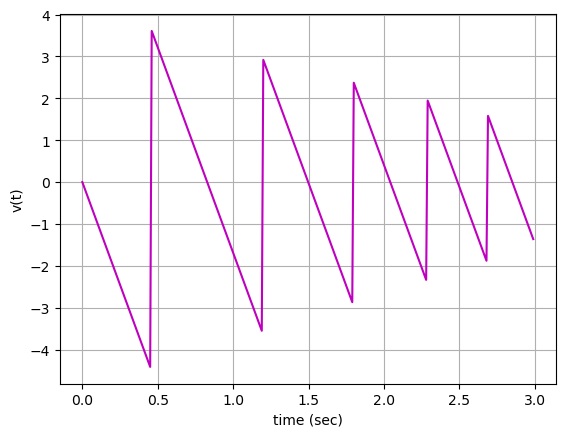

In [10]:
plt.figure()
plt.plot(thist,xhist[3,:-1].T,'m-')
plt.xlabel('time (sec)')
plt.ylabel('v(t)')
plt.grid(True)
plt.show()

รูปที่ 7.3 ความเร็วในแนวแกน $z$ ของลูกบอล

**ตัวอย่าง 7.2** 

ต้องการจำลองพลวัตของอิฐที่ปล่อยลงสู่พื้นที่เป็นน้ำแข็งที่ไร้แรงเสียดทาน โดยมีความเร็วต้นในแนวนอน $V_0$ หลังจากนั้นเลื่อนไปในระนาบ 2 
มิติดังแสดงในรูปที่ 7.4   

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch7_brickfall.png" width=700 />
</div>
<div align="center">
รูปที่ 7.4 พลวัตของอิฐที่ปล่อยลงสู่พื้นน้ำแข็งและเลื่อนใน 2 มิติ
</div>

พลวัตในช่วงลอยอยู่เหนือพื้น หรือในระบบลูกผสมจะเรียกว่า เวกเตอร์ฟิลด์เรียบ (smooth vector field) คำนวณได้จาก
$$
\begin{align*}
\dot{x} &= f(x) \\
\Rightarrow 
\left[\begin{array}{c}
\dot{q} \\
\dot{v}
\end{array}\right] &=
\left[\begin{array}{c}
-v \\
-g
\end{array}\right] \tag{7.2}
\end{align*} 
$$

สร้างฟังก์ชันการ์ด $\phi(x)$ เพื่อตรวจสอบการสัมผัส ในตัวอย่างนี้คือระยะทางแนวดิ่ง คือในขณะที่อิฐลอยอยู่เหนือพื้น 
$$
\phi(x) \ge 0 \tag{7.3}
$$

ฟังก์ชันจัมพ์แมพ $\gamma(x)$ เมื่ออิฐตกถึงพื้น จะกำหนดค่าความเร็วในแนวดิ่งเป็นศูนย์
$$
x' = \gamma(x) = 
\left[\begin{array}{c}
q_x \\
q_y \\
v_x \\
0
\end{array}\right] \tag{7.4}
$$

เค้าโครงของอัลกอริทึมลูกผสมจะเป็นดังนี้
<hr>

while t < t_final:
<br>&nbsp; &nbsp; if $\phi(x) \ge 0$:
<br>&nbsp; &nbsp; &nbsp; &nbsp; $\dot{x} = f(x)$ &nbsp; &nbsp; # (Ex. RK4)
<br>&nbsp; &nbsp; else: &nbsp; &nbsp;# $(\phi = 0)$
<br>&nbsp; &nbsp;&nbsp; &nbsp;$x' = \gamma(x)$

<hr>

ทิ้งให้เป็นแบบฝึกหัดสำหรับผู้อ่านในการเขียนโค้ด โดยลอกเลียนได้จากตัวอย่าง 7.1 

### 7.2.2 วิธีก้าวตามขั้นเวลา

วิธีการที่สองที่ใช้ในการแก้ปัญหาพลวัตที่มีการสัมผัสเรียกว่า *วิธีก้าวตามขั้นเวลา (time stepping)* หรืออีกชื่อหนึ่งที่ใช้ในสาขาระบบควบคุมคือ 
*วิธีสัมผัสโดยปริยาย (contact-implicit)* หลักการคือแก้ปัญหาการหาค่าเหมาะที่สุดแบบมีเงื่อนไขในแต่ละขั้นเวลา
โดยโมเดลการสัมผัสเป็นเงื่อนไขบังคับอสมการที่ไม่ยอมให้มีการล่วงล้ำต่อกันระหว่างวัตถุ (inter-penetration) 
กำหนดเป็นระยะทางมีเครื่องหมาย (signed distance) 
$\phi(x) \ge 0$ และหาคำตอบได้เป็นแรงสัมผัส (คือตัวคูณลากรานจ์ในปัญหาการหาค่าเหมาะที่สุด) ร่วมกับสถานะ 

**ตัวอย่าง 7.3** 

แก้ปัญหาอิฐที่ปล่อยลงสู่พื้นที่เป็นน้ำแข็งที่ไร้แรงเสียดทานในตัวอย่าง 7.2 โดยวิธีก้าวตามขั้นเวลา เริ่มจากกฎการเคลื่อนที่ของนิวตัน $f = ma$
$$
m\dot{v} = -mg + J^T\lambda \tag{7.5}
$$
โดย
$$
g = 
\left[\begin{array}{c}
0 \\
9.8
\end{array}\right], \;\;\; x = 
\left[\begin{array}{c}
q \\
v
\end{array}\right] \tag{7.6}
$$
ตัวคูณลากรานจ์ $\lambda$ ใน (7.5) คือแรงสัมผัส และ $J$ เรียกว่าจาโคเบียนสัมผัส (contact Jacobian) 
เป็นตัวบรรยายความสัมพันธ์ระหว่างแรงสัมผัสกับพิกัดวางนัยทั่วไป

นิยามฟังก์ชันระยะทางมีเครื่องหมาย โดยในตัวอย่างนี้คือการเลือกแกนพิกัดในแนวดิ่งคือ $y$
$$
\phi(q) = Jq = \big[0 \;\;\; 1\big]
\left[\begin{array}{c}
q_x \\
q_y
\end{array}\right] \tag{7.7}
$$
เมื่อใช้การประมาณค่าออยเลอร์ย้อนหลังกับ (7.5) ได้เป็น
$$
m \left(\frac{V_{k+1}-V_k}{h}\right) = -mg + J^T\lambda_k \tag{7.8}
$$
และเงื่อนไข KKT 
$$
\begin{align*}
q_{k+1} &= q_k + hv_{k+1} \tag{7.9}\\
\phi(q_{k+1}) &\ge 0 \tag{7.10}\\
\lambda_k &\ge 0 \tag{7.11}\\
\phi(q_{k+1})\alpha_k &= 0 \tag{7.12}
\end{align*}
$$ อธิบายแต่ละเงื่อนไข 
* (7.9) มาจากการประมาณค่าย้อนหลังออยเลอร์กับจลนศาสตร์ 
* (7.10) ฟังก์ชันระยะทางมีเครื่องหมายต้องไม่เป็นลบในเวลาที่อิฐลอยอยู่ในอากาศ
* (7.11) แรงสัมผัสไม่เป็นลบหมายความว่าเป็นแรงผลักเท่านั้น ไม่ใช่แรงดึงจากพื้น
* (7.12) ต้องไม่มีค่าแรงสัมผัสนอกจากเกิดการสัมผัสแล้วเท่านั้น

จะเห็นว่าแม้เราเริ่มต้นเขียนสมการจากฟิสิกส์ แต่สุดท้ายได้ปัญหาในรูปของ QP ที่สามารถใช้ตัวแก้ปัญหาในการหาคำตอบเหมาะที่สุดได้ 

จัดรูปปัญหาโดยคููณด้วย $v_{k+1}^T$  ได้เป็น
$$
\begin{align*}
\underset{v_{k+1}}{min} \;\; &\frac{1}{2}mv_{k+1}^Tv_{k+1} + mv_{k+1}^T(hg - v_k) \\
s.t. \;\; &J(q_k + hv_{k+1}) \ge 0
\end{align*} \tag{7.13}
$$

สังเกตว่าแรงสัมผัสคือตัวคูณลากรานจ์ที่มีการคำนวณค่าอย่างชัดแจ้ง แต่เวลาการสัมผัสที่แน่นอนจะไม่สามารถทราบได้ (ทราบแต่ขั้นเวลา) และวิธีการนี้ไม่สามารถขยายไปยังการหาค่าปริพันธ์อันดับสูงเช่น RK4 ได้โดยง่าย ปัญหาสำคัญอีกประการหนึ่งเมื่อพิจารณาเงื่อนไข (CS) จาก (7.12) เป็นฟังก์ชันที่ไม่เรียบ ไม่สามารถใช้ตัวแก้ปัญหาเช่น IPOPT ได้นอกจากปรับเป็น $\phi(q_{k+1})\lambda_k = \rho$ 
ตามที่ได้อธิบายในบทที่ 2 

การเขียนโค้ดทิ้งให้เป็นแบบฝึกหัดสำหรับผู้อ่าน 

## 7.4 สรุปท้ายบท

ในบทนี้เป็นการศึกษาการหาค่าเหมาะที่สุดสำหรับปัญหาที่มีการสัมผัส ซึ่งเป็นเหตุการณ์ที่เกิดขึ้นปกติสำหรับระบบหลายประเภท 
เช่นการสัมผัสพื้นโดยขาของหุ่นยนต์เคลื่อนที่ขณะก้าวเดิน การสัมผัสวัตถุชิ้นงานโดยมือจับ เราได้นำเสนอ 2 วิธีการคือวิธีลูกผสม 
และวิธีก้าวตามขั้นเวลา 

สรุปประเด็นสำคัญสำหรับวิธีลูกผสม 

* สามารถคำนวณเวลาการสัมผัสที่แม่นยำ
* ไม่มีการคำนวณแรงสัมผัสอย่างชัดแจ้ง 
* ใช้การหาปริพันธ์ที่มีความแม่นยำสูงได้
* ในกรณีที่ทราบเวลาการสัมผัสล่วงหน้า เช่นการเดินของหุ่นยนต์ตามแผน จะไม่จำเป็นต้องมีฟังก์ชันการ์ดและเพียงฟังก์ชันที่หาอนุพันธ์ได้
* สามารถประยุกต์ใช้กับวิธีการอื่นเช่น DIRCOL, MPC ได้โดยง่าย
* ใช้งานอย่างแพร่หลายในระบบหุ่นยนต์ที่การสัมผัสไม่ซับซ้อน

ประเด็นสำคัญสำหรับวิธีก้าวตามขั้นเวลา

* ไม่ทราบเวลาการสัมผัสที่แน่นอน (ทราบเพียงขั้นเวลาที่เกิดการสัมผัส)
* มีการคำนวณแรงสัมผัสอย่างชัดแจ้ง
* ไม่สามารถขยายไปยังการหาปริพันธ์ขั้นสูงเช่น RK4 ดังนั้นจึงต้องใช้ขั้นเวลาค่าน้อย
* เป็นวิธีการที่ใช้ในเครื่องมือการจำลองที่นิยม เช่น PyBullet, Dart, Gazebo


## บรรณานุกรม

1. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2025.

2. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 



## โจทย์ปัญหา

7-1 จากตัวอย่าง 7.2 เขียนโค้ดจำลองพลวัตของอิฐที่ปล่อยลงสู่พื้นโดยวิธีลูกผสม 

7-2 จากตัวอย่าง 7.3 เขียนโค้ดเพื่อหาคำตอบเหมาะที่สุดสำหรับพลวัตของอิฐที่ปล่อยลงสู่พื้น โดยใช้ตัวแก้ปัญหาเช่น IPOPT หรือ SNOP

7-3 โจทย์ข้อนี้คือต้องการหาแนววิถีเหมาะที่สุดแบบลูกผสมสำหรับขาหุ่นยนต์อย่างง่าย เรียกว่าหุ่นยนต์กระโดดขาเดี่ยว (one-legged hopper) ในระนาบ 2 มิติดังแสดงในรูปที่ P7.1 โครงสร้างประกอบด้วยมวล $m$ ส่วนตัวหุ่นยนต์และส่วนเท้าที่สัมผัสพื้น กำหนดให้เท่ากันเพื่อทำให้ปัญหาง่ายขึ้น เมื่อหุ่นยนต์สัมผัสพื้น แรงเชิงเส้นในแนวขา $F$ จะผลักให้หุ่นยนต์ลอยขึ้นในอากาศ และใช้แรงบิด $t$ เพื่อปรับองศาของขาสำหรับการสัมผัสพื้นและกระโดดครั้งต่อไป

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch7_hopper_1l.png" width=700 />
</div>
<div align="center">
รูปที่ P7.1 หุ่นยนต์กระโดดขาเดี่ยว
</div>

กำหนดสถานะเป็นตำแหน่งและความเร็วของกายและเท้าหุ่นยนต์ และตัวควบคุมคือแรงเชิงเส้นและแรงบิด
$$
x = 
\left[\begin{array}{c}
r_b \\
r_f \\
v_b \\
v_f
\end{array}\right] \in \mathbb{R}^8, \;\;\;
u = 
\left[\begin{array}{c}
F \\
\tau
\end{array}\right] \in \mathbb{R}^2 \tag{P7.1}
$$

กำหนดโหมดหมายเลข 1 และ 2 แทนภาวะที่หุ่นยนต์สัมผัสพื้น และลอยตัวเหนือพื้นตามลำดับ นิยามจัมพ์แมพสำหรับการเปลี่ยนผ่านระหว่างโหมด คือเมื่อเท้าสัมผัสพื้นให้ความเร็วในแนวดิ่งเป็นศูนย์ (เพื่อความง่ายจะไม่พิจารณาการลื่นไถลที่อาจเกิดขึ้น)
$$
x' = g_{21}(x) = 
\left[\begin{array}{c}
r_b \\
r_f \\
v_b \\
0
\end{array}\right] \tag{P7.2}
$$
และจากเท้าสัมผัสพื้นสู่การลอยตัวในอากาศจะไม่มีการเปลี่ยนแปลงของสถานะในปัญหานี้ (เสมือนกับการคูณด้วยเมทริกซ์เอกลักษณ์)
$$
x' = g_{12}(x) = x \tag{P7.3}
$$
กำหนดแผนการกระโดดของหุ่นยนต์นี้เป็นการสลับระหว่างจุดเงื่อน โดยมีช่วงที่เท้าติดพื้นและช่วงลอยในอากาศจำนวนเท่ากับ N1 และ N2 ตามลำดับ บังคับเงื่อนไขดังนี้

<br>for k = 1:N1:
<br>&nbsp; &nbsp; $x_{k+1} = f_1(x_k,u_k)$
<br>&nbsp; &nbsp; $\phi(x) = 0$
<br>for k = (N1+1):N2:
<br>&nbsp; &nbsp; $x_{k+1} = f_2(x_k,u_k)$
<br>&nbsp; &nbsp; $\phi(x) \gt 0$
<br>$x_{N2} = g_{21}(x_{N2-1})
<br>$\phi(x_{N2}) = 0$

ทำซ้ำตามจำนวนรอบการกระโดดที่ต้องการ

เขียนโค้ดเพื่อหาแนววิถีเหมาะที่สุดโดยใช้ตัวแก้ปัญหาเช่น IPOPT และจำลองการกระโดดบน meshcat

<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>